In [8]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
#Loading in Premier League data 

premier_league_df= pd.read_csv("Premier_League.csv")
premier_league_df.head()

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,"60,095",Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,...,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,"42,212",Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,...,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,"17,120",Brentford,1,Manchester City,0,34.4,65.6,...,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,"40,130",Chelsea,1,Newcastle United,1,64.4,35.6,...,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,"25,198",Crystal Palace,1,Nottingham Forest,1,66.0,34.0,...,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


In [10]:
print(premier_league_df.columns.values)

['date' 'clock' 'stadium' 'attendance' 'Home Team' 'Goals Home'
 'Away Team' 'Away Goals' 'home_possessions' 'away_possessions'
 'home_shots' 'away_shots' 'home_on' 'away_on' 'home_off' 'away_off'
 'home_blocked' 'away_blocked' 'home_pass' 'away_pass' 'home_chances'
 'away_chances' 'home_corners' 'away_corners' 'home_offside'
 'away_offside' 'home_tackles' 'away_tackles' 'home_duels' 'away_duels'
 'home_saves' 'away_saves' 'home_fouls' 'away_fouls' 'home_yellow'
 'away_yellow' 'home_red' 'away_red' 'links']


In [11]:
premier_league_df.describe()

,Goals Home,Away Goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,...,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.634211,1.218421,50.447632,49.552368,13.973684,11.313158,4.913158,3.897368,5.110526,4.236842,...,50.611053,49.391579,2.650000,3.213158,10.607895,10.957895,1.676316,1.939474,0.052632,0.026316
std,1.419944,1.183518,12.896888,12.896888,5.600541,4.908593,2.495449,2.230159,2.547365,2.397604,...,11.012290,11.010639,1.838069,1.967905,3.273213,3.481321,1.259462,1.364464,0.246063,0.160284
min,0.000000,0.000000,18.300000,18.900000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,10.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,39.900000,40.400000,10.000000,8.000000,3.000000,2.000000,3.000000,3.000000,...,43.450000,42.475000,1.000000,2.000000,8.000000,8.750000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,51.000000,49.000000,14.000000,11.000000,5.000000,4.000000,5.000000,4.000000,...,51.450000,48.550000,2.000000,3.000000,10.000000,11.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,59.600000,60.100000,17.000000,15.000000,7.000000,5.000000,7.000000,6.000000,...,57.525000,56.550000,4.000000,5.000000,13.000000,13.000000,3.000000,3.000000,0.000000,0.000000
max,9.000000,6.000000,81.100000,81.700000,33.000000,30.000000,15.000000,11.000000,15.000000,12.000000,...,90.000000,90.000000,9.000000,11.000000,23.000000,25.000000,6.000000,7.000000,2.000000,1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


premier_league_df['MatchOutcome'] = premier_league_df.apply(
    lambda row: 'Win' if row['Goals Home'] > row['Away Goals'] else ('Loss' if row['Goals Home'] < row['Away Goals'] else 'Draw'),
    axis=1
)


target_column = 'MatchOutcome'
categorical_features = ['Home Team', 'Away Team', 'stadium']  
numerical_features = [
    'Goals Home', 'Away Goals', 'home_possessions', 'away_possessions',
    'home_shots', 'away_shots', 'home_on', 'away_on', 'home_off', 'away_off',
    'home_blocked', 'away_blocked', 'home_pass', 'away_pass', 'home_chances',
    'away_chances', 'home_corners', 'away_corners', 'home_offside',
    'away_offside', 'home_tackles', 'away_tackles', 'home_duels', 'away_duels',
    'home_saves', 'away_saves', 'home_fouls', 'away_fouls', 'home_yellow',
    'away_yellow', 'home_red', 'away_red'
]  


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


X = premier_league_df.drop(columns=[target_column, 'date', 'clock', 'attendance']) 
y = premier_league_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

num_features = numerical_features

cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

all_feature_names = list(num_features) + list(cat_features)

X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

In [14]:
#One hot encoded categorical features
encoded_features_df = X_train_preprocessed_df[cat_features].sample(10) 
print("Sample of One-Hot Encoded Categorical Features:")
print(encoded_features_df.head())

Sample of One-Hot Encoded Categorical Features:
     Home Team_Arsenal  Home Team_Aston Villa  Home Team_Bournemouth  \
13                 0.0                    0.0                    1.0   
278                0.0                    0.0                    0.0   
1                  0.0                    0.0                    0.0   
108                0.0                    0.0                    0.0   
300                0.0                    0.0                    0.0   

     Home Team_Brentford  Home Team_Brighton and Hove Albion  \
13                   0.0                                 0.0   
278                  0.0                                 0.0   
1                    0.0                                 0.0   
108                  0.0                                 0.0   
300                  0.0                                 1.0   

     Home Team_Chelsea  Home Team_Crystal Palace  Home Team_Everton  \
13                 0.0                       0.0               

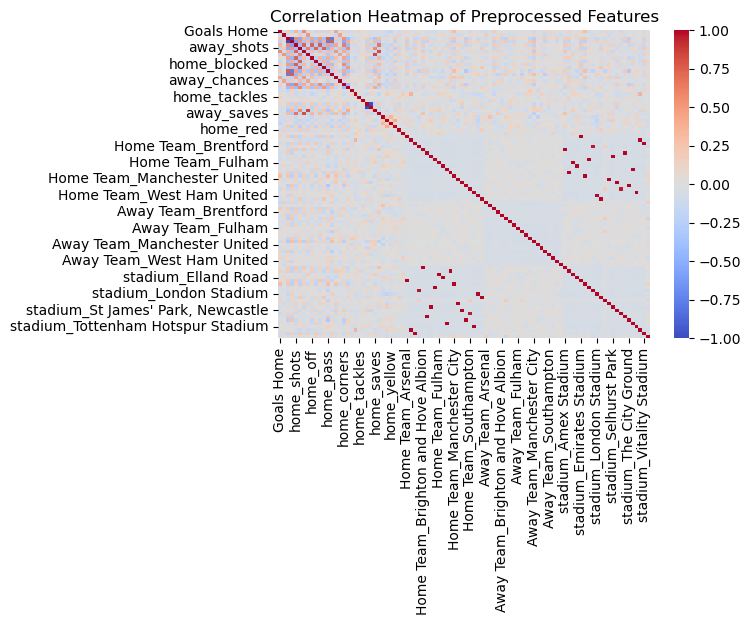

In [26]:
# Heatmap of preprocessed features 
plt.figure(figsize=(6, 4))
sns.heatmap( X_train_preprocessed_df.corr(), cmap='coolwarm', annot=False, fmt=".1f")
plt.title("Correlation Heatmap of Preprocessed Features")
plt.show()

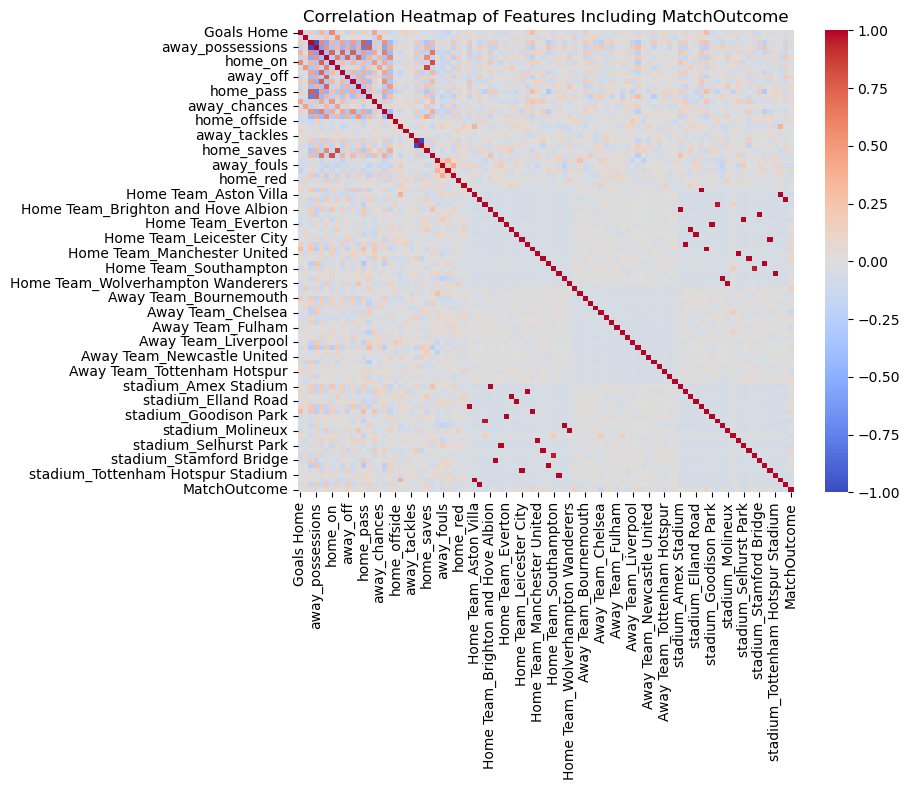

In [27]:
# Encode MatchOutcome numerically
match_outcome_map = {'Win': 1, 'Draw': 0, 'Loss': -1}
X_train_preprocessed_df['MatchOutcome'] = y_train.map(match_outcome_map)

plt.figure(figsize=(8, 6))
sns.heatmap(X_train_preprocessed_df.corr(), cmap='coolwarm', annot=False, fmt=".1f")
plt.title("Correlation Heatmap of Features Including MatchOutcome")
plt.show()